# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**2301ACDSES3**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Twitter Sentiment Classification: Predicting Individuals' Beliefs in Climate Change Based on their Tweets!

In a world where companies strive to reduce carbon footprints and champion sustainability, understanding how people perceive and embrace climate change is crucial. In this notebook, we try to unravel the beliefs and sentiments surrounding climate change. We will also create a machine learning model that is able to classify whether or not a tweep believes in climate change, based on their novel tweet data.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of determining whether people believe in climate change or not;
- 5. evaluate the accuracy of the best machine learning model;
- 6. explain the inner working of the model to a non-technical audience.


### Twitter Sentiment Analysis: Problem Statement

In this project, we will implement an NLP Twitter sentiment analysis model that will help to overcome the challenges of sentiment classification of tweets. We will be classifying the tweets into different class descriptions. The necessary details regarding the dataset involving the Twitter sentiment analysis project are:

The dataset consists of 43 943 tweets that were collected between Apr 27, 2015 and Feb 21, 2018. The tweets are in relation to climate change. Each tweet is labelled as one of 4 classes, which are described below.

##### **Class Description**

**2 News:** the tweet links to factual news about climate change.

**1 Pro:** the tweet supports the belief of man-made climate change.

**0 Neutral:** the tweet neither supports nor refutes the belief of man-made climate change.

**-1 Anti:** the tweet does not believe in man-made climate change Variable definitions.

##### **Features**

**sentiment:** Which class a tweet belongs in (refer to Class Description above).

**message:** Tweet body.

**tweetid:** Twitter unique id.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling and Model Performance</a>

<a href=#seven>6. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we will import the libraries that will be used throughout our analysis and modelling. |

---

This section will cover the Comet experiment and the importation of libraries we will use throughout our analysis.

In [1]:
# Creating an experiment with your api key
from comet_ml import Experiment
experiment = Experiment(
    api_key = "UVJcHJVJ2SGuzgGBwpfFz6mt8",
    project_name = "classification",
    workspace = "mati9210"
    )

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/mati9210/classification/394e0a481c254630824007a64f698c01



In [2]:
# Libraries for data loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud
from plotly import graph_objects as go 
sns.set()
%matplotlib inline

# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

#nlkt libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Malose
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Malose
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Malose
[nltk_data]     Matlakala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we will load two datasets into a DataFrame. |

---

We will load the `train_df` and `test_df` files and view the first 5 rows of each dataset.

In [3]:
#loading the test and train dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

In [4]:
#Veiwing the first 5 rows of the train dataset
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [5]:
#Veiwing the first 5 rows of the test dataset
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

### Observation 
1. Train dataset (train_df):
   Has 3 columns, the **sentiment**, **message** and **tweetid**.

2. Test dataset (test_df):
   Has 2 columns, the **message** and **tweetid**

where:

- sentiment is the class of the tweet.
- message is the tweet itself
- tweetid is the unique ID for the tweet
- ---

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of the variables in the DataFrame. |

---


The purpose of this section is to understand and gain insights from the data before applying any specific modeling or analysis techniques. It will help us understand the data better and identify quality issues, e.g., missing values and inconsistencies.

In [6]:
#check for null values in both train and test dataset 

print('Train Dataset')
display(train_df.isnull().sum())

print('Test Dataset')
display(test_df.isnull().sum())

Train Dataset


sentiment    0
message      0
tweetid      0
dtype: int64

Test Dataset


message    0
tweetid    0
dtype: int64

#### Observation
- No missing values were observed from the dataset.

In [7]:
#Check shape of datasets

print(f'The shape of the train dataset: {train_df.shape}')
print(f'The shape of the test dataset:  {test_df.shape}')

The shape of the train dataset: (15819, 3)
The shape of the test dataset:  (10546, 2)


#### Observation
- Above are the number of rows and columns contained on each dataset.
- The train dataset has 15 819 rows with 3 columns, and the test dataset has 10 546 rows with 2 columns.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Observation
- The 'sentiment' and 'tweetid' columns contain int data types.
- The 'message' column contains object data type.

In [9]:
# check the unique values in target feature
train_df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

#### Observation

The unique values in the 'sentiment' column describe **Class Descriptions** of the tweets as follows:

**2 News:** the tweet links to factual news about climate change.

**1 Pro:** the tweet supports the belief of man-made climate change.

**0 Neutral:** the tweet neither supports nor refutes the belief of man-made climate change.

**-1 Anti:** the tweet does not believe in man-made climate change Variable definitions.

In [10]:
# Select all duplicate rows based on the message column from train dataset
duplicate_train_df = train_df[train_df.
                    duplicated(['message',
                                'sentiment'],
                               keep=False)]

# View number of duplicate rows
duplicate_train_df.shape

(1900, 3)

#### Observation
- There are 1,900 duplicate messages which come from retweeted messages. We interpret these as agreement or support of what was tweeted.

In [11]:
#function to convert class from numerical to word definition of class for a better visualisation

def class_convert(df):
    df = train_df.copy()
    word_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 2:
            word_class.append('News')
        elif class_num == 1:
            word_class.append('Pro')
        elif class_num == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
            
    df['sentiment'] = word_class
        
    return df

#saving a working copy of train dataset
train_copy = class_convert(train_df)
#saving a working copy of test dataset
test_copy = test_df.copy()

In [12]:
#Veiwing the new edited first 5 rows of the train dataframe
train_copy.head()

sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

### Message Count

- We will check the number of messages per sentiment.
- The results show that there are 8530 tweets that support the belief of man-made climate change, 3640 tweets are factual news links, 2353 are neither in support nor anti the belief of man-made climate change, and finally, 1296 do not support the belief.

In [13]:
#checking message count grouped by sentiment

sentiment_temp_table = train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message', ascending=False)
sentiment_temp_table

sentiment  message
3       Pro     8530
2      News     3640
1   Neutral     2353
0      Anti     1296

### Distribution of the Sentiment Count

- Below are the Bar Plot and Bar Chart to illustrate the distribution of the counts explained above.

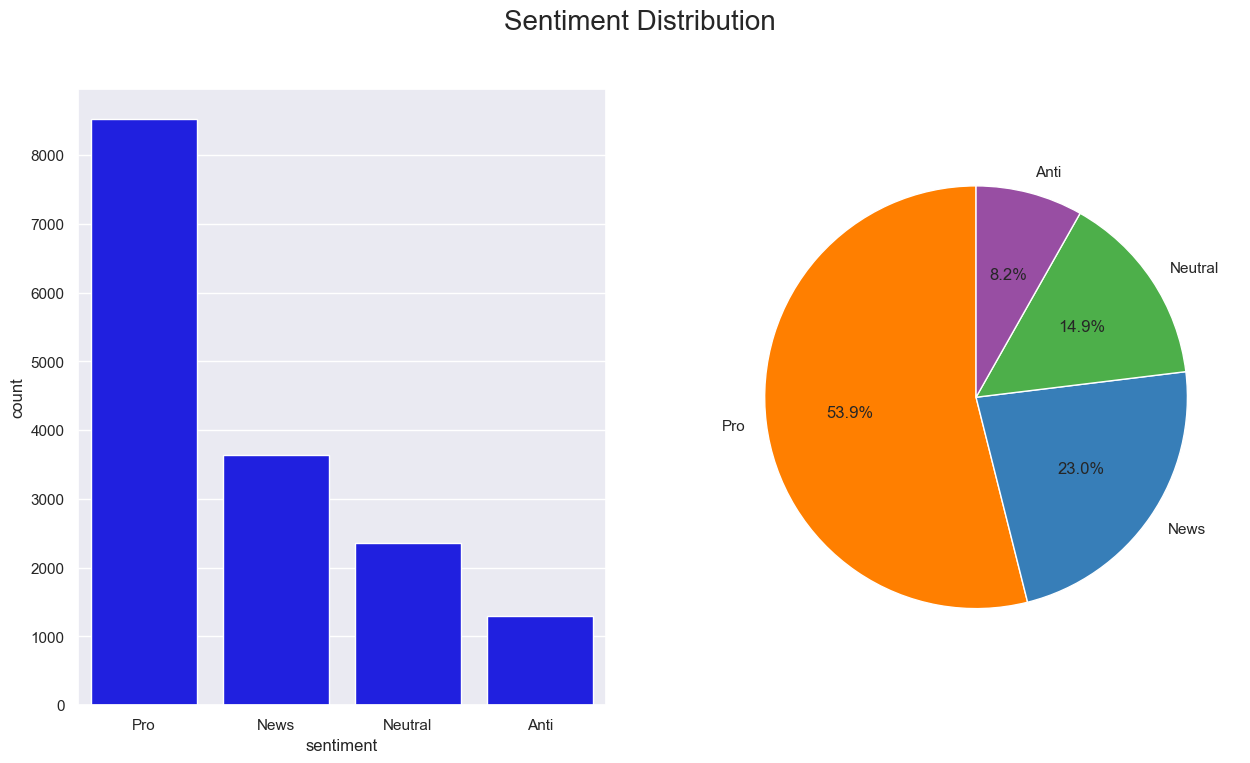

In [14]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8), dpi=100)

sns.countplot(train_copy['sentiment'], ax=axes[0], color = 'blue',)
labels=['Pro', 'News', 'Neutral', 'Anti']

custom_colors = ["#FF7F00", "#377EB8", "#4DAF4A", "#984EA3"]
sns.set_palette(custom_colors)
axes[1].pie(train_copy['sentiment'].value_counts(),
            labels=labels, autopct='%1.1f%%',
            startangle=90, colors=custom_colors)

fig.suptitle('Sentiment Distribution', fontsize=20)
plt.show()

### Tweet WordCloud

- The WordCloud below will illustrate the most frequently used words related to climate change.

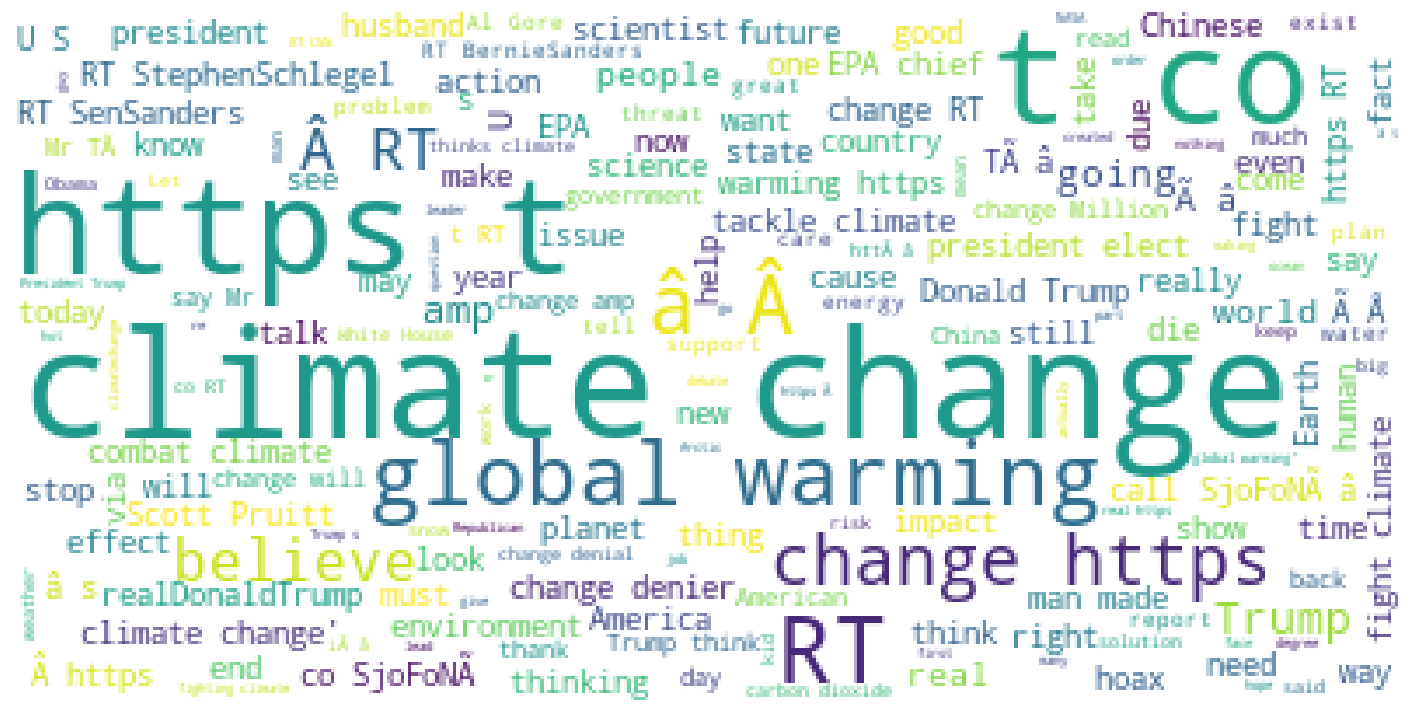

In [15]:
#visualising the entire tweet text to see the most frequent used word in relation to climate
full_text = " ".join(train_df['message'])
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize= (18,18))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
senti_gb = train_copy.groupby('sentiment')

Anti = "".join(senti_gb.get_group('Anti')['message'])
Neutral = "".join(senti_gb.get_group('Neutral')['message'])
Pro = "".join(senti_gb.get_group('Pro')['message'])
News = "".join(senti_gb.get_group('News')['message'])

### Tweet WordCloud for Each Sentiment

We will create word clouds for each of the sentiments to determine which words are used in each class of tweets.

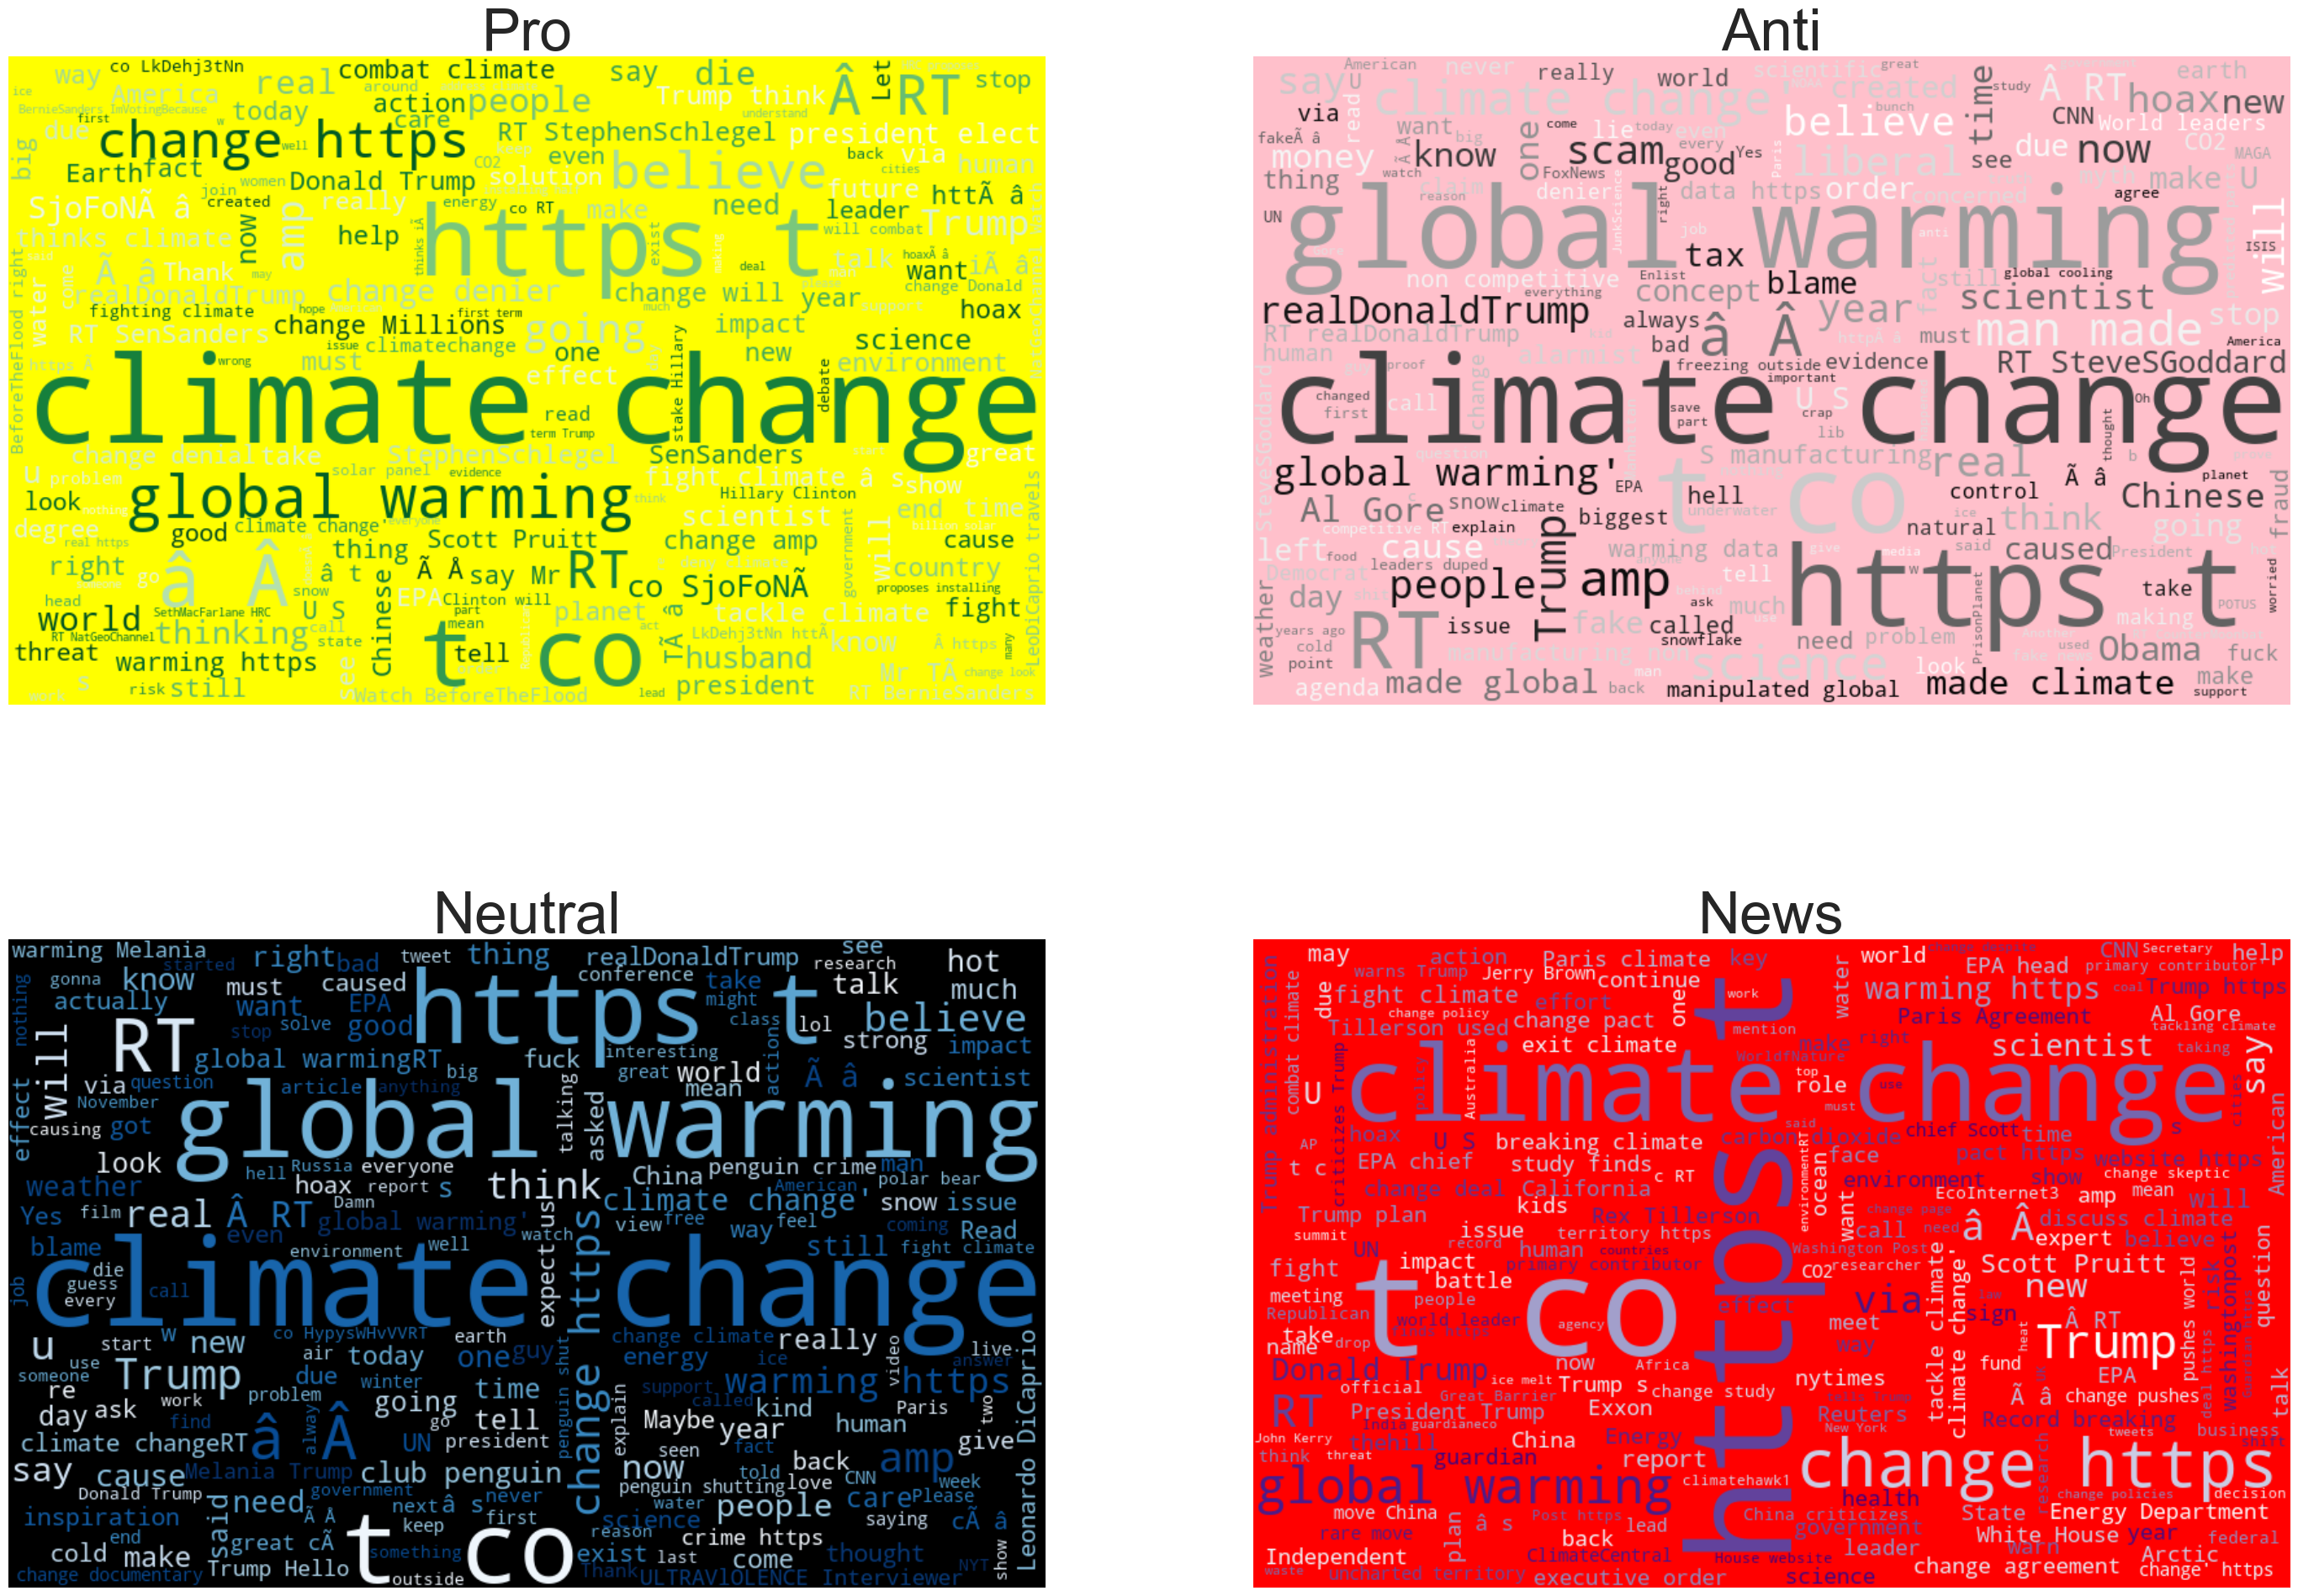

In [17]:
# Create wordcloud for the anti climate change class
Anti_wc = WordCloud(width=800, 
                    height=500, 
                    random_state=110, 
                    max_font_size=110, 
                    background_color='pink',
                    colormap="Greys").generate(Anti)

# Create wordcolud for the neutral climate change class
Neutral_wc = WordCloud(width=800, 
                    height=500, 
                    random_state=110, 
                    max_font_size=110, 
                    background_color='black',
                    colormap="Blues").generate(Neutral)

# Create wordcolud for the pro climate change class
Pro_wc = WordCloud(width=800,
                    height=500, 
                    random_state=110, 
                    max_font_size=110, 
                    background_color='yellow',
                    colormap="Greens").generate(Pro)

# Create wordcolud for the news climate change class
News_wc = WordCloud(width=800, 
                    height=500, 
                    random_state=110, 
                    max_font_size=110, 
                    background_color='red',
                    colormap="Purples").generate(News)

# Plot pro and anti wordclouds next to eachother for comparisson
fig, arr = plt.subplots(2,2, figsize=(35,25))
arr[0,0].imshow(Pro_wc, interpolation="bilinear")
arr[0,1].imshow(Anti_wc, interpolation="bilinear")
arr[1,0].imshow(Neutral_wc, interpolation="bilinear")
arr[1,1].imshow(News_wc, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in fig.axes:
    plt.sca(ax)
    plt.axis('off')

arr[0,0].set_title('Pro', fontsize=50)
arr[0,1].set_title('Anti', fontsize=50)
arr[1,0].set_title('Neutral', fontsize=50)
arr[1,1].set_title('News', fontsize=50)
plt.show()

#### Observation
- We observe in the "Anti" WordCloud, Donald Trump appearing, Chinese, as well as negative words such as scam, hoax, contro and hell.
- This could be due to the fact that during his administration, Donald Trump expressed a lot of skepticism about climate change, and went as far as suggesting that it was invented by China to undermine America's competitiveness.

In [18]:
#Messages of first 5 Pro Sentiment Class tweets
for tweet in senti_gb.get_group('Pro')['message'].head():
    print(tweet)

PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
It's not like we lack evidence of anthropogenic global warming
#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight
Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j


In [19]:
#Messages of first 5 News Sentiment Class tweets
for tweet in senti_gb.get_group('News')['message'].head():
    print(tweet)

RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…
Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX
Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg
RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…


In [20]:
#Messages of first 5 Neutral Sentiment Class tweets
for tweet in senti_gb.get_group('Neutral')['message'].head():
    print(tweet)

Calum: *tweets abt reunitingish w the cast*
-sees replies begging him to come to their countries-
Calum: *goes back to rting climate change*
we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj
@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice
We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda
RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real


In [21]:
#Messages of first 5 Anti Sentiment Class tweets
for tweet in senti_gb.get_group('Anti')['message'].head():
    print(tweet)

Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more
@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!
RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr… 
@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️
RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.
How's his maid...illegal or
http…


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we will clean and rearrange the dataset. |

---

**In this section, we will perform the following:**
- Replace the url links with the word 'url'.
- Remove stopwords.
- Lemmatization.
- Split the train dataset into features and label.
- Downsample and Upsample the dataset.

In [22]:
#function to replace all url links with the word 'url'
def replace_tweet_urls(df, column_name):
    
    # Describing regrex url pattern
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    
    #substitute text to replace url
    sub_url = r'url'
    
    df[column_name] = df[column_name].replace(to_replace = pattern_url,
                            value = sub_url, 
                            regex = True) #train dataset
    return df

# Applying replace_tweet_urls function on both datasets replace all long urls with just 'url'  
replace_tweet_urls(train_copy, 'message')
replace_tweet_urls(test_copy, 'message')

message  tweetid
0      Europe will now be looking to China to make su...   169760
1      Combine this with the polling of staffers re c...    35326
2      The scary, unimpeachable evidence that climate...   224985
3      @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4      RT @FakeWillMoore: 'Female orgasms cause globa...   872928
...                                                  ...      ...
10541  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542  2016: the year climate change came home: Durin...   875167
10543  RT @loop_vanuatu: Pacific countries positive a...    78329
10544  RT @xanria_00018: You’re so hot, you must be t...   867455
10545  RT @chloebalaoing: climate change is a global ...   470892

[10546 rows x 2 columns]

In [23]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

# function to clean tweet. removes all puntuations, covert to lower
def df_cleaner(df):
    '''
    takes in a dataframe and cleans a specified column by, 
    removing all punctuations, numbers, stopwords, tokenises them
    
    '''
    df = re.sub('<[^<]+?>','', df)
    df = re.sub(r'[^\w\s]','',df, re.UNICODE)
    df = df.lower()
    df = [lemmatizer.lemmatize(token) for token in df.split(" ")]
    df = [lemmatizer.lemmatize(token, "v") for token in df]
    df = [word for word in df if not word in stop_words]
    df = ' '.join(df)
    df = ''.join([i for i in df if not i.isdigit()])
    
    return df

In [24]:
#applying the df_cleaner function on both datasets to clean the `message` columns
train_copy['message'] = train_copy.message.apply(lambda x: df_cleaner(x))
test_copy['message'] = test_copy.message.apply(lambda x: df_cleaner(x))

In [26]:
#visualising the cleaned columns
train_copy.head()

sentiment                                            message  tweetid
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221
1       Pro       like lack evidence anthropogenic global warm   126103
2      News  rt rawstory researcher say three year act clim...   698562
3       Pro  todayinmaker wire   wa pivotal year war climat...   573736
4       Pro  rt soynoviodetodas  racist sexist climate chan...   466954

In [27]:
#convert sentiment class back to numeric

def class_convert_2(df):
    
    df = train_copy.copy()
    numerical_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 'News':
            numerical_class.append(2)
        elif class_num == 'Pro':
            numerical_class.append(1)
        elif class_num == 'Neutral':
            numerical_class.append(0)
        else:
            numerical_class.append(-1)
            
    df['sentiment'] = numerical_class
        
    return df

train_copy = class_convert_2(train_df)

In [28]:
train_copy.head()

sentiment                                            message  tweetid
0          1  polyscimajor epa chief doesnt think carbon dio...   625221
1          1       like lack evidence anthropogenic global warm   126103
2          2  rt rawstory researcher say three year act clim...   698562
3          1  todayinmaker wire   wa pivotal year war climat...   573736
4          1  rt soynoviodetodas  racist sexist climate chan...   466954

In [29]:
#Split train dataset features into Predictor and Target
X_imbalanced = train_copy['message'] 
y_imbalanced = train_copy['sentiment'] 

unseen_X = test_copy['message'] 

In [30]:
#check sentiment distribution to determine which sentiments needs upsampling
train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message')

sentiment  message
0         -1     1296
1          0     2353
3          2     3640
2          1     8530

### Downsampling and Upsampling The Dataset

These are the techniques we use to address class imbalance or dataset size issues. Applying these techniques will enable the model to learn effectively from all classes and enhance its performance.

In [31]:
'''
Downsampling the dataset

'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
down_sampled_news = resample(news, replace=True, n_samples=len(anti))   

#Upsample Neutral sentiment
down_sampled_neutral = resample(neutral, replace=True, n_samples=len(anti)) 

#Upsample Anti sentiment
down_sampled_pro = resample(pro, replace=True, n_samples=len(anti)) 

down_sampled_df = pd.concat([down_sampled_pro, down_sampled_news, down_sampled_neutral, anti])

In [32]:
#Split Down sampled train dataset features into Predictors and Target 
X_down_sampled = down_sampled_df['message']
y_down_sampled = down_sampled_df['sentiment']

In [33]:
'''
Upsampling the dataset
'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
upsampled_news = resample(news, replace=True, n_samples=len(pro))   

#Upsample Neutral sentiment
upsampled_neutral = resample(neutral, replace=True, n_samples=len(pro)) 

#Upsample Anti sentiment
upsampled_anti = resample(anti, replace=True, n_samples=len(pro)) 

upsample_df = pd.concat([pro, upsampled_news, upsampled_neutral, upsampled_anti])

In [34]:
#Split Upsampled train dataset features into Predictors and Target 
X_upsampled = upsample_df['message']
y_upsampled = upsample_df['sentiment']

<a id="five"></a>
## 5. Modelling and Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create one or more classification models that are able to accurately predict the tweet sentiments. |

---

In this section, we will first create a function to train the models chosen. We will then train each model individually, on the different data sets (imbalanced, upsampled and downsampled). The models used are the `LogisticRegression`, `DecisionTree`, `RandomForest`, and the `MultinomialNB`.

The function below is created and used to train and test the train dataset. Model predictions are made and metrics created.

In [35]:
def model_trainer(model, X, y):
    
    
    #"""create train model function"""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    
    
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_mscore = f1_score(y_test, y_pred, average='weighted')
    accuracy_mscore = accuracy_score(y_test, y_pred)
    recall_mscore = recall_score(y_test, y_pred, average='weighted')
    precision_mscore = precision_score(y_test, y_pred, average='weighted')
        
       
    print('Accuracy: ', accuracy_mscore)
    print('f1_score: ', f1_mscore)
    print('Recall: ', recall_mscore)
    print('Precision: ', precision_mscore)
    
    metrics = {'Accuracy':accuracy_mscore, 'f1_score':f1_mscore, 'Recall': recall_mscore, 'Precision':precision_mscore}
    #experiment.log_metrics(metrics)
    #experiment.end()
    return f1_mscore, accuracy_mscore, recall_mscore, precision_mscore

### Metrics

Below, we will calculate the metrics for each model.

#### 1. Logistic Regression

Logistic regression is a classification algorithm used to predict the probability of an event occurring or belonging to a specific class. It's commonly used when the outcome variable is binary or categorical.

In [36]:
#Creating an object of Logistic Regression
log_regression = LogisticRegression(multi_class='ovr')

In [37]:
imbalanced_lr_f1, imbalanced_lr_accuracy, imbalanced_lr_recall,\
imbalanced_lr_presicion = model_trainer(log_regression, X_imbalanced, y_imbalanced)

Accuracy:  0.684260429835651
f1_score:  0.6286083639963008
Recall:  0.684260429835651
Precision:  0.73888231843092


In [38]:
downsampled_lr_f1, downsampled_lr_accuracy, downsampled_lr_recall, \
downsampled_lr_presicion = model_trainer(log_regression, X_down_sampled, y_down_sampled)

Accuracy:  0.7328833172613307
f1_score:  0.7285315322802952
Recall:  0.7328833172613307
Precision:  0.7339292263511256


In [39]:
upsampled_lr_f1, upsampled_lr_accuracy, upsampled_lr_recall, \
upsampled_lr_presicion = model_trainer(log_regression, X_upsampled, y_upsampled)

Accuracy:  0.917936694021102
f1_score:  0.9154583594005454
Recall:  0.917936694021102
Precision:  0.9198726938210924


In [40]:
#creating a logistic regression metric score dictionary to hold for all the three varied datasets
log_regression_metric_dictionary = { 'Accuracy': [imbalanced_lr_accuracy, downsampled_lr_accuracy, upsampled_lr_accuracy],
                                    'Recall': [imbalanced_lr_recall, downsampled_lr_recall, upsampled_lr_recall], 
                                    'Precision': [imbalanced_lr_presicion, downsampled_lr_presicion, upsampled_lr_presicion], 
                                    'F1-Score': [imbalanced_lr_f1, downsampled_lr_f1, upsampled_lr_f1]} 

#Using the dictionary to create a dataframe for all the varied datasets
log_regression_df = pd.DataFrame(log_regression_metric_dictionary, index = ['Imbalanced_LR', 
                                                                            'Downsampled_LR', 
                                                                            'Upsampled_LR']).sort_values('F1-Score', ascending=False)
#showing the dataframe
log_regression_df

Accuracy    Recall  Precision  F1-Score
Upsampled_LR    0.917937  0.917937   0.919873  0.915458
Downsampled_LR  0.732883  0.732883   0.733929  0.728532
Imbalanced_LR   0.684260  0.684260   0.738882  0.628608

##### Plotting the Log Regression Metric Scores

{'web': 'https://www.comet.com/api/image/download?imageId=8fc6eb4afeb44bc388a7267e2452bc52&experimentKey=394e0a481c254630824007a64f698c01',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=8fc6eb4afeb44bc388a7267e2452bc52&experimentKey=394e0a481c254630824007a64f698c01',
 'imageId': '8fc6eb4afeb44bc388a7267e2452bc52'}

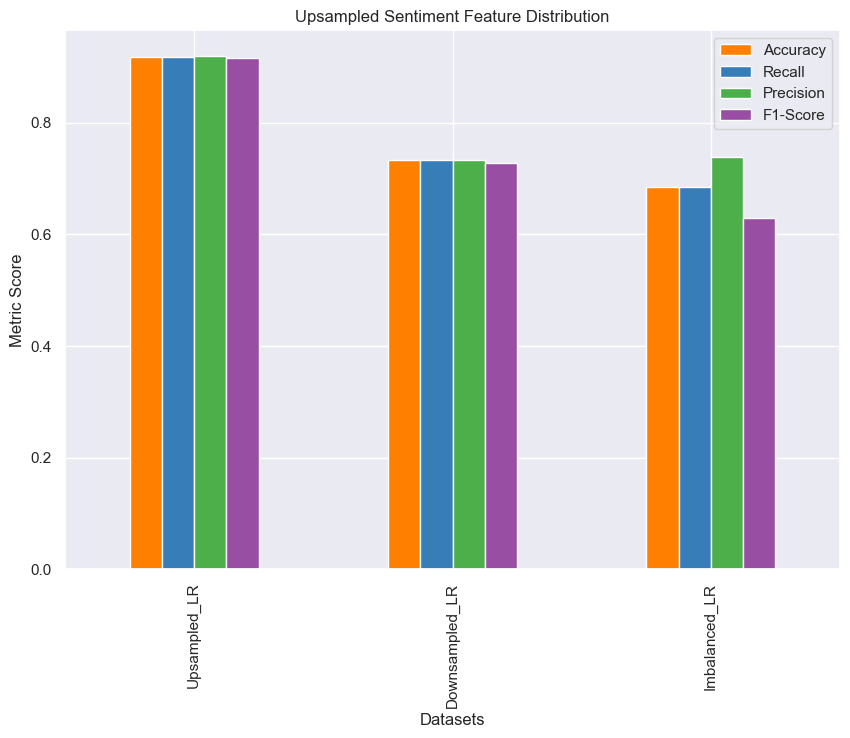

In [41]:
#Plotting the metric scores for all varied datasets

log_regression_df.plot(kind='bar', stacked=False, figsize=(10,7))
plt.title('Upsampled Sentiment Feature Distribution')
plt.ylabel('Metric Score')
plt.xlabel('Datasets')
experiment.log_figure(figure_name='Logistic Regression Model Metric Scores')

#### 2. Decision Tree

Decision trees are versatile classification algorithms that make predictions based on a series of if-else decisions. They are easy to interpret and can handle both categorical and numerical data.

In [42]:
#Creating a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

In [43]:
imbalanced_tree_f1, imbalanced_tree_accuracy, imbalanced_tree_recall,\
imbalanced_tree_presicion = model_trainer(tree, X_imbalanced, y_imbalanced)

Accuracy:  0.6264222503160556
f1_score:  0.6168413491536058
Recall:  0.6264222503160556
Precision:  0.6206747766363805


In [44]:
downsampled_tree_f1, downsampled_tree_accuracy, downsampled_tree_recall, \
downsampled_tree_presicion = model_trainer(tree, X_down_sampled, y_down_sampled)

Accuracy:  0.5419479267116682
f1_score:  0.5320903162270113
Recall:  0.5419479267116682
Precision:  0.5754596563714741


In [45]:
upsampled_tree_f1, upsampled_tree_accuracy, upsampled_tree_recall, \
upsampled_tree_presicion = model_trainer(tree, X_upsampled, y_upsampled)

Accuracy:  0.8168229777256741
f1_score:  0.7900304195200538
Recall:  0.8168229777256741
Precision:  0.8396301728329089


In [46]:
#creating a decision tree metric score dictionary to hold for all the three varied datasets
tree_metric_dict = { 'Accuracy': [imbalanced_tree_accuracy, downsampled_tree_accuracy, upsampled_tree_accuracy],
                                    'Recall': [imbalanced_tree_recall, downsampled_tree_recall, upsampled_tree_recall], 
                                    'Precision': [imbalanced_tree_presicion, downsampled_tree_presicion, upsampled_tree_presicion], 
                                    'F1-Score': [imbalanced_tree_f1, downsampled_tree_f1, upsampled_tree_f1]} 

#Using the dictionary to create a dataframe for all the varied datasets
tree_df = pd.DataFrame(tree_metric_dict, index = ['Imbalanced_LR', 
                                                                            'Downsampled_LR', 
                                                                            'Upsampled_LR']).sort_values('F1-Score', ascending=False)
tree_df

Accuracy    Recall  Precision  F1-Score
Upsampled_LR    0.816823  0.816823   0.839630  0.790030
Imbalanced_LR   0.626422  0.626422   0.620675  0.616841
Downsampled_LR  0.541948  0.541948   0.575460  0.532090

##### Plotting the Decision Tree Metric Scores

<AxesSubplot:title={'center':'Decision Tree Model Metric Scores'}>

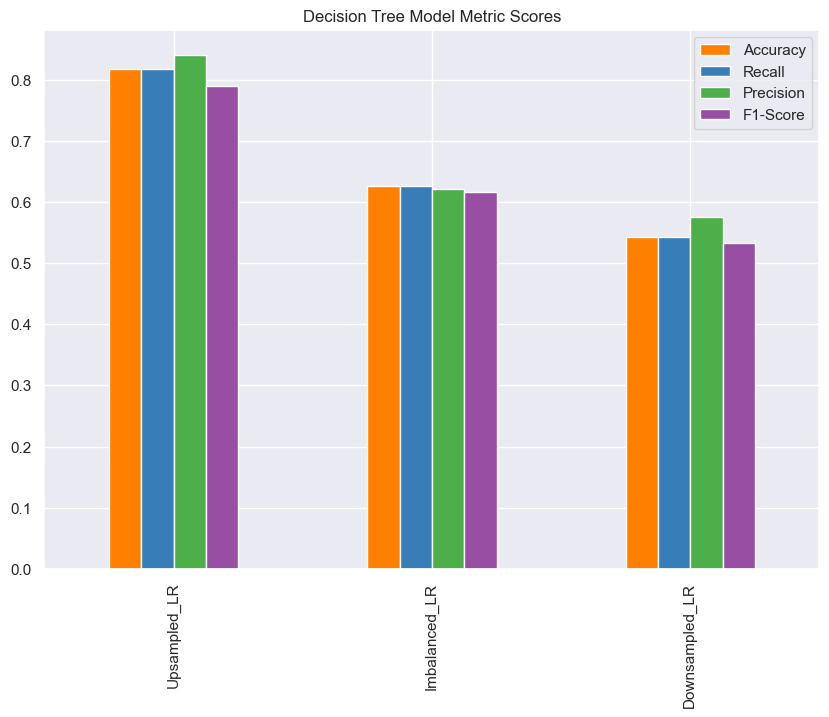

In [47]:
#Plotting the random Decision Tree metric scores for all varied datasets
tree_df.plot(kind='bar', stacked=False, title='Decision Tree Model Metric Scores', figsize=(10,7))

#### 3. Random Forest

Random forests are an ensemble method that combines multiple decision trees to make more accurate predictions. They reduce overfitting and improve generalization by averaging the predictions of multiple trees.

In [48]:
#Creating an object of Random Forest
forest = RandomForestClassifier(n_estimators=100, max_features=1)

In [49]:
imbalanced_forest_f1, imbalanced_forest_accuracy, imbalanced_forest_recall,\
imbalanced_forest_presicion = model_trainer(forest, X_imbalanced, y_imbalanced)

Accuracy:  0.7048040455120101
f1_score:  0.6898515710751885
Recall:  0.7048040455120101
Precision:  0.7165706714063187


In [50]:
upsampled_forest_f1, upsampled_forest_accuracy, upsampled_forest_recall,\
upsampled_forest_presicion = model_trainer(forest, X_upsampled, y_upsampled)

Accuracy:  0.8990328253223916
f1_score:  0.8941833541165134
Recall:  0.8990328253223916
Precision:  0.9087804781465835


In [51]:
downsampled_forest_f1, downsampled_forest_accuracy, downsampled_forest_recall,\
downsampled_forest_presicion = model_trainer(forest, X_down_sampled, y_down_sampled)

Accuracy:  0.6027000964320154
f1_score:  0.6010932416869157
Recall:  0.6027000964320154
Precision:  0.7040671663441428


In [52]:
#creating a Random Forest metric score dictionary to hold for all the three varied datasets
random_forest_metric_dictionary = { 'Accuracy': [imbalanced_forest_accuracy, downsampled_forest_accuracy, upsampled_forest_accuracy],
                                    'Recall': [imbalanced_forest_recall, downsampled_forest_recall, upsampled_forest_recall], 
                                    'Precision': [imbalanced_forest_presicion, downsampled_forest_presicion, upsampled_forest_presicion], 
                                    'F1-Score': [imbalanced_forest_f1, downsampled_forest_f1, upsampled_forest_f1]} 

#Using the dictionary to create a random forest dataframe for all the varied datasets
random_forest_df = pd.DataFrame(random_forest_metric_dictionary, index = ['Imbalanced_Random_Forest', 
                                                                            'Downsampled_Random_Forest', 
                                                                            'Upsampled_Random_Forest']).sort_values('F1-Score', ascending=False)
#showing the dataframe
random_forest_df

Accuracy    Recall  Precision  F1-Score
Upsampled_Random_Forest    0.899033  0.899033   0.908780  0.894183
Imbalanced_Random_Forest   0.704804  0.704804   0.716571  0.689852
Downsampled_Random_Forest  0.602700  0.602700   0.704067  0.601093

##### Plotting the Random Forest Metric Scores

<AxesSubplot:title={'center':'Random Forest Model Metric Scores'}>

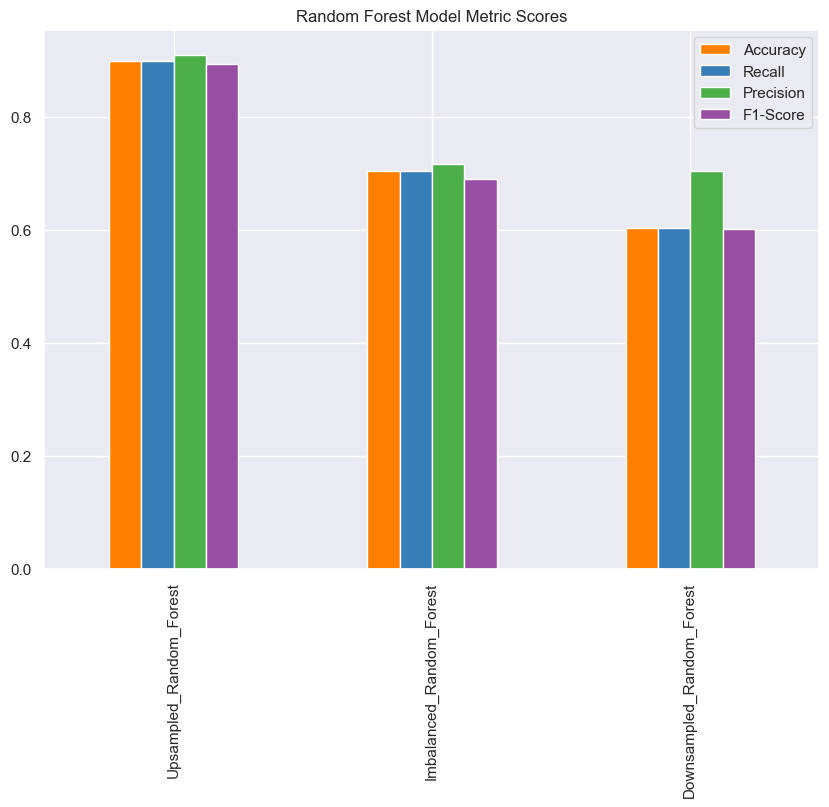

In [53]:
#Plotting the random forest metric scores for all varied datasets
random_forest_df.plot(kind='bar', stacked=False, title='Random Forest Model Metric Scores', figsize=(10,7))

#### 4. Naive Bayes

Multinomial Naive Bayes is a classification algorithm based on Bayes' theorem. It's commonly used for text classification problems, such as sentiment analysis or spam detection.

In [54]:
#Creating an object of Naive Bayes
naive_bayes = MultinomialNB()

In [55]:
imbalanced_naiveb_f1, imbalanced_naiveb_accuracy, imbalanced_naiveb_recall,\
imbalanced_naiveb_presicion = model_trainer(naive_bayes, X_imbalanced, y_imbalanced)

Accuracy:  0.6573957016434893
f1_score:  0.5802805264435966
Recall:  0.6573957016434893
Precision:  0.7648932951553483


In [56]:
upsampled_naiveb_f1, upsampled_naiveb_accuracy, upsampled_naiveb_recall,\
upsampled_naiveb_presicion = model_trainer(naive_bayes, X_upsampled, y_upsampled)

Accuracy:  0.884232121922626
f1_score:  0.8764993421049001
Recall:  0.884232121922626
Precision:  0.8941038363327576


In [57]:
downsampled_naiveb_f1, downsampled_naiveb_accuracy, downsampled_naiveb_recall,\
downsampled_naiveb_presicion = model_trainer(naive_bayes, X_down_sampled, y_down_sampled)

Accuracy:  0.6962391513982642
f1_score:  0.6905411754859072
Recall:  0.6962391513982642
Precision:  0.6984549305197011


In [58]:
#creating a Naive Bayes metric score dictionary to hold for all the three varied datasets
naive_bayes_metric_dictionary = { 'Accuracy': [imbalanced_naiveb_accuracy, downsampled_naiveb_accuracy, upsampled_naiveb_accuracy],
                                    'Recall': [imbalanced_naiveb_recall, downsampled_naiveb_recall, upsampled_naiveb_recall], 
                                    'Precision': [imbalanced_naiveb_presicion, downsampled_naiveb_presicion, upsampled_naiveb_presicion], 
                                    'F1-Score': [imbalanced_naiveb_f1, downsampled_naiveb_f1, upsampled_naiveb_f1]} 

#Using the dictionary to create a naive bayes dataframe for all the varied datasets
naive_bayes_df = pd.DataFrame(naive_bayes_metric_dictionary, index = ['Imbalanced_Naive_Bayes', 
                                                                        'Downsampled_Naive_Bayes', 
                                                                        'Upsampled_Naive_Bayes']).sort_values('F1-Score', ascending=False)
#showing the dataframe
naive_bayes_df

Accuracy    Recall  Precision  F1-Score
Upsampled_Naive_Bayes    0.884232  0.884232   0.894104  0.876499
Downsampled_Naive_Bayes  0.696239  0.696239   0.698455  0.690541
Imbalanced_Naive_Bayes   0.657396  0.657396   0.764893  0.580281

##### Plotting the Naive Bayes Metric Scores

<AxesSubplot:title={'center':'Naive Bayes Model Metric Scores'}>

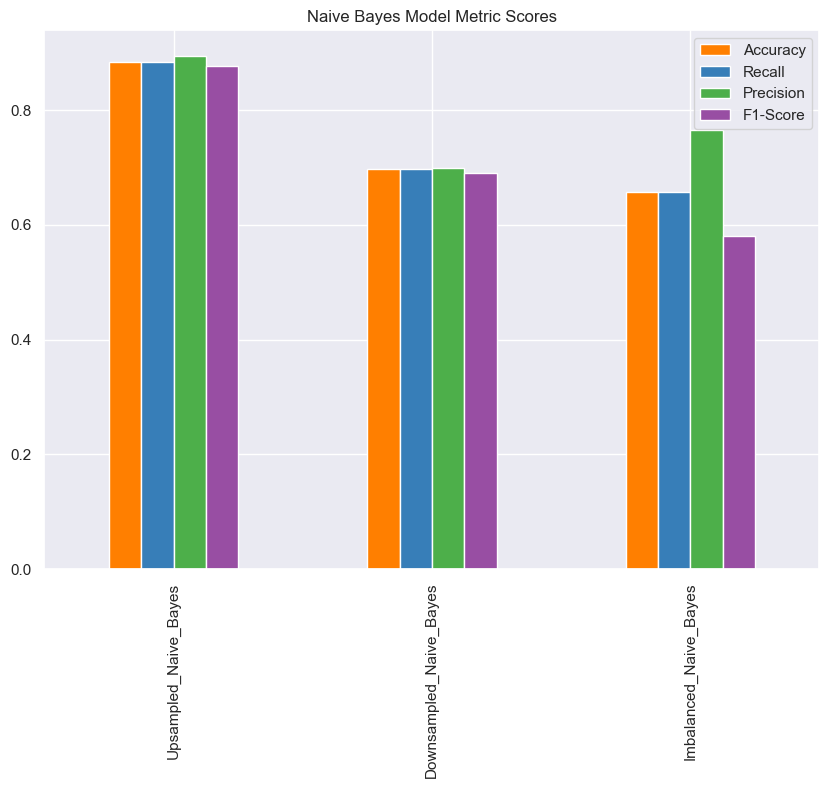

In [59]:
#Plotting the Naive Bayes metric scores for all varied datasets
naive_bayes_df.plot(kind='bar', stacked=False, title='Naive Bayes Model Metric Scores', figsize=(10,7))

#### 5. Polynomial Support Vector Machine (Polynomial SVM):
A polynomial SVM is a classification algorithm that separates data points using a curved decision boundary. 

In [60]:
#creating an object of the polynomial Support Vector Machines
poly_svm = SVC(kernel='poly')

In [61]:
imbalanced_polysvm_f1, imbalanced_polysvm_accuracy, imbalanced_polysvm_recall,\
imbalanced_polysvm_presicion = model_trainer(poly_svm, X_imbalanced, y_imbalanced)

Accuracy:  0.6406447534766119
f1_score:  0.5668995541950945
Recall:  0.6406447534766119
Precision:  0.7561887618667661


In [62]:
upsampled_polysvm_f1, upsampled_polysvm_accuracy, upsampled_polysvm_recall,\
upsampled_polysvm_presicion = model_trainer(poly_svm, X_upsampled, y_upsampled)

Accuracy:  0.9569167643610785
f1_score:  0.9574599332457971
Recall:  0.9569167643610785
Precision:  0.9610392361761952


In [63]:
downsampled_polysvm_f1, downsampled_polysvm_accuracy, downsampled_polysvm_recall,\
downsampled_polysvm_presicion = model_trainer(poly_svm, X_down_sampled, y_down_sampled)

Accuracy:  0.5409836065573771
f1_score:  0.5452414140915449
Recall:  0.5409836065573771
Precision:  0.8028438558057153


In [64]:
#creating a Support Vector Machine metric score dictionary to hold for all the three varied datasets
poly_svm_metric_dictionary = { 'Accuracy': [imbalanced_polysvm_accuracy, downsampled_polysvm_accuracy, upsampled_polysvm_accuracy],
                                'Recall': [imbalanced_polysvm_recall, downsampled_polysvm_recall, upsampled_polysvm_recall], 
                                'Precision': [imbalanced_polysvm_presicion, downsampled_polysvm_presicion, upsampled_polysvm_presicion], 
                                'F1-Score': [imbalanced_polysvm_f1, downsampled_polysvm_f1, upsampled_polysvm_f1]} 

#Using the dictionary to create a Support Vector Machine dataframe for all the varied datasets
poly_svm_df = pd.DataFrame(poly_svm_metric_dictionary, index = ['Imbalanced_Poly_SVM', 
                                                                'Downsampled_Poly_SVM', 
                                                                'Upsampled_Poly_SVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
poly_svm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_Poly_SVM    0.956917  0.956917   0.961039  0.957460
Imbalanced_Poly_SVM   0.640645  0.640645   0.756189  0.566900
Downsampled_Poly_SVM  0.540984  0.540984   0.802844  0.545241

##### Plotting the Polynomial SVM Metric Scores

<AxesSubplot:title={'center':'Support Vector Machine Model Metric Scores'}>

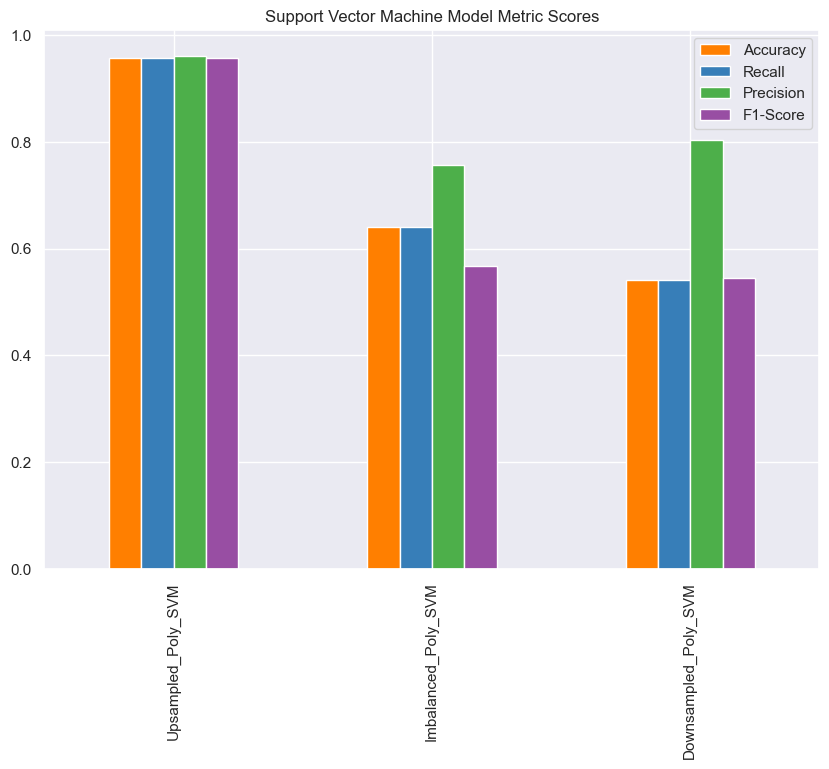

In [65]:
#Plotting the Support Vector Machine metric scores for all varied datasets
poly_svm_df.plot(kind='bar', stacked=False, title='Support Vector Machine Model Metric Scores', figsize=(10,7))

#### 6. Random Basis Function in Support Vector Machine (Random Basic Function in SVM):
Random basic function (RBF) is a type of kernel used in Support Vector Machines (SVMs). RBF SVMs are powerful algorithms for classification tasks. They create complex decision boundaries by transforming the input variables into a high-dimensional space.

In [66]:
# Create an object of Randon Basic Function in SVM
rbf_svc = SVC(kernel='rbf')

In [67]:
imbalanced_rbfsvc_f1, imbalanced_rbfsvc_accuracy, imbalanced_rbfsvc_recall,\
imbalanced_rbfsvc_presicion = model_trainer(rbf_svc, X_imbalanced, y_imbalanced)

Accuracy:  0.6871049304677623
f1_score:  0.6330062307597093
Recall:  0.6871049304677623
Precision:  0.7616899195678274


In [68]:
upsampled_rbfsvc_f1, upsampled_rbfsvc_accuracy, upsampled_rbfsvc_recall,\
upsampled_rbfsvc_presicion = model_trainer(rbf_svc, X_upsampled, y_upsampled)

Accuracy:  0.9575029308323564
f1_score:  0.9575845275493631
Recall:  0.9575029308323564
Precision:  0.9577896942872783


In [69]:
downsampled_rbfsvc_f1, downsampled_rbfsvc_accuracy, downsampled_rbfsvc_recall,\
downsampled_rbfsvc_presicion = model_trainer(rbf_svc, X_down_sampled, y_down_sampled)

Accuracy:  0.7261330761812922
f1_score:  0.7234633050571362
Recall:  0.7261330761812922
Precision:  0.7572224789518792


In [70]:
#creating a Linear Support Vector Machine metric score dictionary to hold for all the three varied datasets
rbf_svm_metric_dictionary = { 'Accuracy': [imbalanced_rbfsvc_accuracy, downsampled_rbfsvc_accuracy, upsampled_rbfsvc_accuracy],
                                'Recall': [imbalanced_rbfsvc_recall, downsampled_rbfsvc_recall, upsampled_rbfsvc_recall], 
                                'Precision': [imbalanced_rbfsvc_presicion, downsampled_rbfsvc_presicion, upsampled_rbfsvc_presicion], 
                                'F1-Score': [imbalanced_rbfsvc_f1, downsampled_rbfsvc_f1, upsampled_rbfsvc_f1]} 

#Using the dictionary to create a Linear Support Vector Machine dataframe for all the varied datasets
rbf_svm_df = pd.DataFrame(rbf_svm_metric_dictionary, index = ['Imbalanced_rbfSVM', 
                                                                'Downsampled_rbfSVM', 
                                                                'Upsampled_rbfSVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
rbf_svm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_rbfSVM    0.957503  0.957503   0.957790  0.957585
Downsampled_rbfSVM  0.726133  0.726133   0.757222  0.723463
Imbalanced_rbfSVM   0.687105  0.687105   0.761690  0.633006

##### Plotting the Random Basic Function in SVM Metric Scores

<AxesSubplot:title={'center':'RBF Support Vector Machine Model Metric Scores'}>

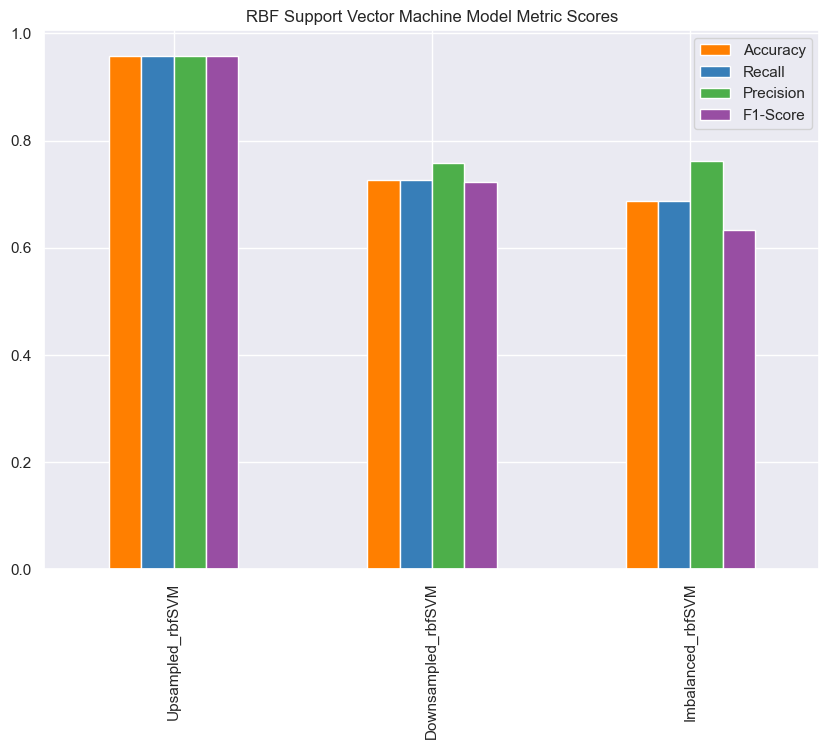

In [71]:
#Plotting the Linear Support Vector Machine metric scores for all varied datasets
rbf_svm_df.plot(kind='bar', stacked=False, title='RBF Support Vector Machine Model Metric Scores', figsize=(10,7))

#### 7. Linear Support Vector Machine (Linear SVM):
A linear SVM is a classification algorithm that creates a straight decision boundary between two classes. Linear SVM is useful when the classes are well-separated and can be easily divided by a line. For example, it can be used to classify whether an email is spam or not based on features like the length of the email, number of exclamation marks, or presence of specific words.

In [72]:
#Create an object of the Linear SVM
linear_svc = SVC(kernel='linear') # Linear Kernel

In [73]:
imbalanced_linearsvm_f1, imbalanced_linearsvm_accuracy, imbalanced_linearsvm_recall,\
imbalanced_linearsvm_presicion = model_trainer(linear_svc, X_imbalanced, y_imbalanced)

Accuracy:  0.7345132743362832
f1_score:  0.713044758753337
Recall:  0.7345132743362832
Precision:  0.737288768659516


In [74]:
upsampled_linearsvm_f1, upsampled_linearsvm_accuracy, upsampled_linearsvm_recall,\
upsampled_linearsvm_presicion = model_trainer(linear_svc, X_upsampled, y_upsampled)

Accuracy:  0.9407971864009379
f1_score:  0.9399581874749191
Recall:  0.9407971864009379
Precision:  0.9412836661114931


In [75]:
downsampled_linearsvm_f1, downsampled_linearsvm_accuracy, downsampled_linearsvm_recall,\
downsampled_linearsvm_presicion = model_trainer(linear_svc, X_down_sampled, y_down_sampled)

Accuracy:  0.7357762777242044
f1_score:  0.732572494415297
Recall:  0.7357762777242044
Precision:  0.7359133541801216


In [76]:
#creating a Linear Support Vector Machine metric score dictionary to hold for all the three varied datasets
linear_svm_metric_dictionary = {'Accuracy': [imbalanced_linearsvm_accuracy, downsampled_linearsvm_accuracy, upsampled_linearsvm_accuracy],
                                'Recall': [imbalanced_linearsvm_recall, downsampled_linearsvm_recall, upsampled_linearsvm_recall], 
                                'Precision': [imbalanced_linearsvm_presicion, downsampled_linearsvm_presicion, upsampled_linearsvm_presicion], 
                                'F1-Score': [imbalanced_linearsvm_f1, downsampled_linearsvm_f1, upsampled_linearsvm_f1]} 

#Using the dictionary to create a Linear Support Vector Machine dataframe for all the varied datasets
linear_svm_df = pd.DataFrame(linear_svm_metric_dictionary, index = ['Imbalanced_LinearSVM', 
                                                                    'Downsampled_LinearSVM', 
                                                                    'Upsampled_LinearSVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
linear_svm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_LinearSVM    0.940797  0.940797   0.941284  0.939958
Downsampled_LinearSVM  0.735776  0.735776   0.735913  0.732572
Imbalanced_LinearSVM   0.734513  0.734513   0.737289  0.713045

##### Plotting the Linear SVM Metric Score

<AxesSubplot:title={'center':'Linear Support Vector Machine Model Metric Scores'}>

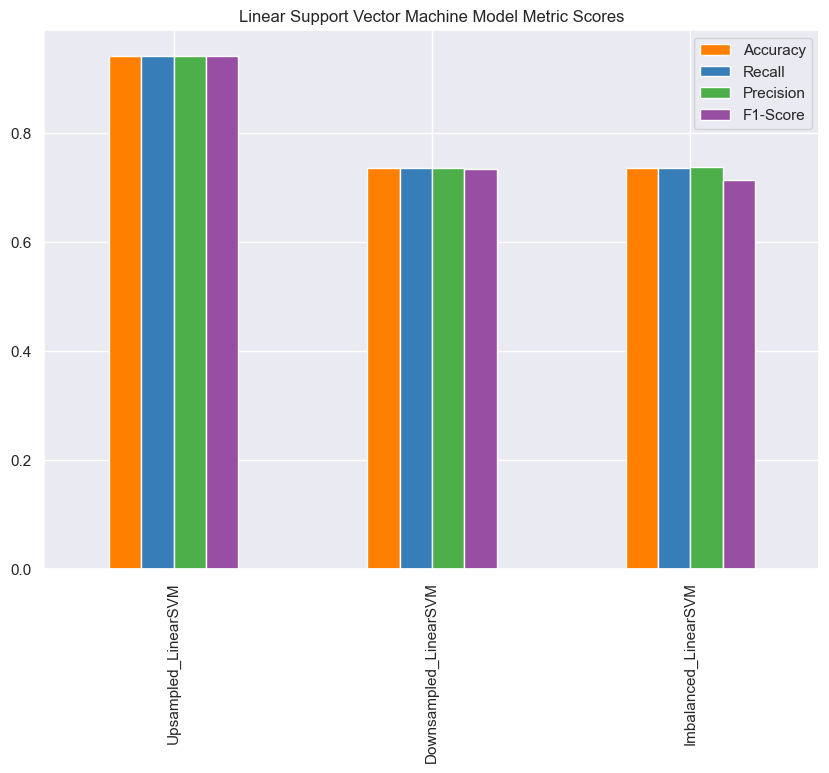

In [77]:
#Plotting the Linear Support Vector Machine metric scores for all varied datasets
linear_svm_df.plot(kind='bar', stacked=False, title='Linear Support Vector Machine Model Metric Scores', figsize=(10,7))

#### 8. K-Nearest Neighbors (KNN):
KNN is a simple and intuitive classification algorithm. Given a new data point, KNN looks at the K nearest neighbors in the training data and assigns the majority class to the new point. KNN works based on the assumption that similar data points are likely to have similar labels.

In [78]:
knn = KNeighborsClassifier(3)

In [79]:
imbalanced_knn_f1, imbalanced_knn_accuracy, imbalanced_knn_recall,\
imbalanced_knn_presicion = model_trainer(knn, X_imbalanced, y_imbalanced)

Accuracy:  0.6093552465233881
f1_score:  0.6096525675530667
Recall:  0.6093552465233881
Precision:  0.6138091009234798


In [80]:
upsampled_knn_f1, upsampled_knn_accuracy, upsampled_knn_recall,\
upsampled_knn_presicion = model_trainer(knn, X_upsampled, y_upsampled)

Accuracy:  0.8200468933177022
f1_score:  0.8088945597760355
Recall:  0.8200468933177022
Precision:  0.8233441694020636


In [81]:
downsampled_knn_f1, downsampled_knn_accuracy, downsampled_knn_recall,\
downsampled_knn_presicion = model_trainer(knn, X_down_sampled, y_down_sampled)

Accuracy:  0.5689488910318226
f1_score:  0.5648906769413712
Recall:  0.5689488910318226
Precision:  0.5724836457451193


In [82]:
#creating a KNN metric score dictionary to hold for all the three varied datasets
knn_metric_dictionary = {'Accuracy': [imbalanced_knn_accuracy, downsampled_knn_accuracy, upsampled_knn_accuracy],
                        'Recall': [imbalanced_knn_recall, downsampled_knn_recall, upsampled_knn_recall], 
                        'Precision': [imbalanced_knn_presicion, downsampled_knn_presicion, upsampled_knn_presicion], 
                        'F1-Score': [imbalanced_knn_f1, downsampled_knn_f1, upsampled_knn_f1]} 

#Using the dictionary to create a KNN dataframe for all the varied datasets
knn_df = pd.DataFrame(knn_metric_dictionary, index = ['Imbalanced_KNN', 
                                                        'Downsampled_KNN', 
                                                        'Upsampled_KNN']).sort_values('F1-Score', ascending=False)
#showing the dataframe
knn_df

Accuracy    Recall  Precision  F1-Score
Upsampled_KNN    0.820047  0.820047   0.823344  0.808895
Imbalanced_KNN   0.609355  0.609355   0.613809  0.609653
Downsampled_KNN  0.568949  0.568949   0.572484  0.564891

##### Plotting the KNN Metric Scores

<AxesSubplot:title={'center':'KNN Model Metric Scores'}>

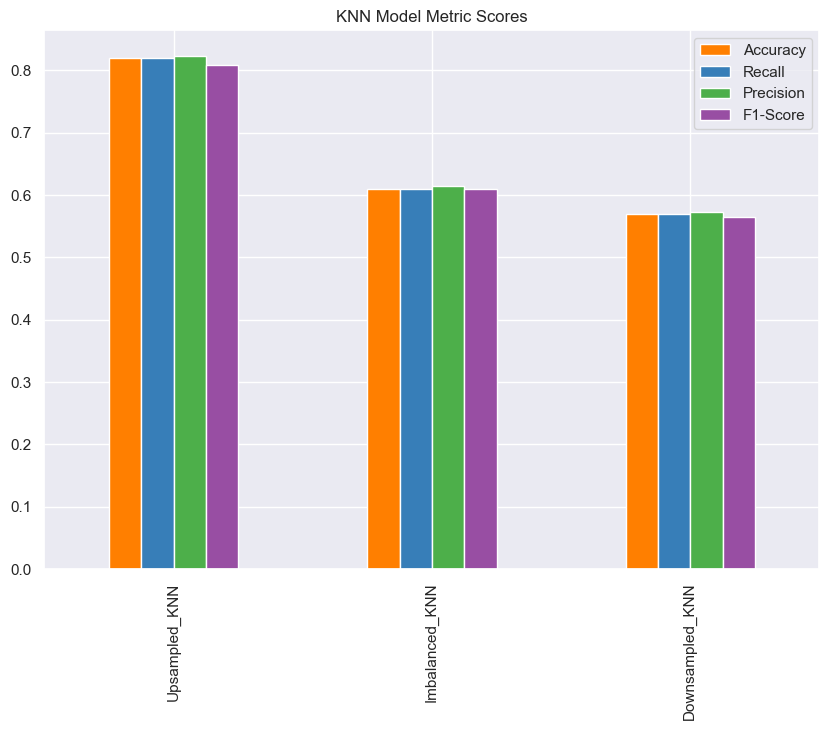

In [83]:
#Plotting the k-Nearest Neighbour metric scores for all varied datasets
knn_df.plot(kind='bar', stacked=False, title='KNN Model Metric Scores', figsize=(10,7))

In [84]:
# Example values for demonstration purposes
upsampled_lr_f1 = 0.912857
upsampled_lr_accuracy = 0.915006
upsampled_lr_recall = 0.915006
upsampled_lr_precision = 0.915745

upsampled_naiveb_f1 = 0.879009
upsampled_naiveb_accuracy = 0.88613
upsampled_naiveb_recall = 0.657395
upsampled_naiveb_precision = 0.894651

upsampled_polysvm_f1 = 0.955819
upsampled_polysvm_accuracy = 0.955305
upsampled_polysvm_recall = 0.955305
upsampled_polysvm_precision = 0.959828

upsampled_rbfsvc_f1 = 0.959616
upsampled_rbfsvc_accuracy = 0.959555
upsampled_rbfsvc_recall = 0.959555
upsampled_rbfsvc_precision = 0.959713

# Create a dictionary to hold the results
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Poly SVM', 'RBF SVM'],
    'F1 Score': [upsampled_lr_f1, upsampled_naiveb_f1, upsampled_polysvm_f1, upsampled_rbfsvc_f1],
    'Accuracy': [upsampled_lr_accuracy, upsampled_naiveb_accuracy, upsampled_polysvm_accuracy, upsampled_rbfsvc_accuracy],
    'Recall': [upsampled_lr_recall, upsampled_naiveb_recall, upsampled_polysvm_recall, upsampled_rbfsvc_recall],
    'Precision': [upsampled_lr_precision, upsampled_naiveb_precision, upsampled_polysvm_precision, upsampled_rbfsvc_precision]
}

# Create a DataFrame from the results dictionary
performance_matrix = pd.DataFrame(results)

# Set the 'Model' column as the index
performance_matrix.set_index('Model', inplace=True)

# Print the performance matrix
print(performance_matrix)

                     F1 Score  Accuracy    Recall  Precision
Model                                                       
Logistic Regression  0.912857  0.915006  0.915006   0.915745
Naive Bayes          0.879009  0.886130  0.657395   0.894651
Poly SVM             0.955819  0.955305  0.955305   0.959828
RBF SVM              0.959616  0.959555  0.959555   0.959713


<a id="seven"></a>
## 6. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will discuss the best performing model and why it was chosen as the best fit out of all the models. |

---

### Best Performing Model

- We have chosen the Random Basic Function in SVM (RBF SVM) as our best performing model.

- RBF SVM has been widely used and studied in various natural language processing tasks, including sentiment analysis. It has demonstrated good performance in terms of accuracy and robustness, making it a popular choice in many text classification scenarios.

- Both the Polynomial SVM and RBF SVM models have high F1 scores, which demonstrate effective sentiment classification in tweets.

- The RBF SVM model achieved a slightly higher F1 score, implying superior performance compared to the polynomial SVM model.

- The performance of both models suggest that SVM algorithms are suitable for classifying sentiments expressed in tweets about climate change.

- These findings indicate the potential for leveraging these models in influencing marketing activities, by accurately identifying and understanding the sentiments of Twitter users towards climate change.

- Businesses/brands can leverage the insights gained from these models to tailor their campaigns to effectively target individuals who express specific sentiments related to climate change.

## Predict Function and Submission

In [85]:
#create predict function
def test_target_predictor(model, X, y, test):
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('model', model)])
    
    pipe.fit(X, y)
    y_pred = pipe.predict(test)
    
    return y_pred

In [86]:
y_pred_Upsampled_RBFsvc = test_target_predictor(rbf_svc, X_upsampled, y_upsampled, unseen_X)

In [87]:
y_pred_Upsampled_RBFsvc

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [88]:
#Making the tweetid to be the idex
test = test_copy.set_index('tweetid')
final_test = test.index


#Creating the kaggle submission Dataframe
final_dataframe = {'tweetid': final_test, 'sentiment':np.round(y_pred_Upsampled_RBFsvc, 0)}
k_submission = pd.DataFrame(data=final_dataframe)
k_submission = k_submission[['tweetid', 'sentiment']]

In [89]:
k_submission.to_csv('RBFsvc_submission.csv', index = False) #writing csv file

In [90]:
# To end all experiments for Comet
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/mati9210/classification/394e0a481c254630824007a64f698c01
COMET INFO:   Parameters:
COMET INFO:     C                               : 1.0
COMET INFO:     algorithm                       : auto
COMET INFO:     alpha                           : 1.0
COMET INFO:     bootstrap                       : True
COMET INFO:     break_ties                      : False
COMET INFO:     cache_size                      : 200
COMET INFO:     ccp_alpha                       : 0.0
COMET INFO:     class_prior                     : 1
COMET INFO:     class_weight                    : 1
COMET INFO:     coef0                           : 0.0
COMET INFO:  

COMET INFO:     model_min_samples_leaf          : 1
COMET INFO:     model_min_samples_split         : 2
COMET INFO:     model_min_weight_fraction_leaf  : 0.0
COMET INFO:     model_multi_class               : ovr
COMET INFO:     model_n_estimators              : 100
COMET INFO:     model_n_jobs                    : 1
COMET INFO:     model_n_neighbors               : 3
COMET INFO:     model_oob_score                 : False
COMET INFO:     model_p                         : 2
COMET INFO:     model_penalty                   : l2
COMET INFO:     model_probability               : False
COMET INFO:     model_random_state              : 3
COMET INFO:     model_shrinking                 : True
COMET INFO:     model_solver                    : lbfgs
COMET INFO:     model_splitter                  : best
COMET INFO:     model_tol                       : 0.001
COMET INFO:     model_verbose                   : 0
COMET INFO:     model_warm_start                : False
COMET INFO:     model_weights  

### References

OpenAI. (2023). Available at: https://chat.openai.com/ (Accessed: 21 June 2023).

Explore Data Science Academy. (2023). Athena. Available at: https://athena.explore.ai/student/dashboard

Goyal, G. (2023). Twitter Sentiment Analysis Using Python | Introduction & Techniques. Available at: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/ (Accessed: 22 June 2023).

